In [7]:
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
import numpy as np
import numpy.linalg as la

# Problem 1

Complete the following fuction, implementing anisotropic diffusion for black and
white images using the following boundary conditions:
For the top edge let
\begin{align*}
U^{n+1}_{l,m} = U^n_{l,m}+&\lambda(g(|U^n_{l−1,m} − U^n_{l,m}|)(U^n_{l−1,m} − U^n_{l,m})\\
&+ g(|U^n_{l+1,m} − U^n_{l,m}|)(U^n_{l+1,m} − U^n_{l,m})\\
&+ g(|U^n_{l,m+1} − U^n_{l,m}|)(U^n_{l,m+1} − U^n_{l,m}))
\end{align*}
Do the other edges similarly.
For the top left corner let
\begin{align*}
U^{n+1}_{l,m} = U^n_{l,m}+&λ(g(|U^n_{l+1,m} − U^n_{l,m}|)(U^n_{l+1,m} − U^n_{l,m})
+ \\ &g(|U^n_{l,m+1} − U^n_{l,m}|)(U^n_{l,m+1} − U^n_{l,m}))
\end{align*}
Do the other corners similarly.
Essentially we are just using the terms of the difference scheme that are actually defined.
In your function, use
$$g(x) = e^{-(\frac{x}{\sigma} )^2}$$


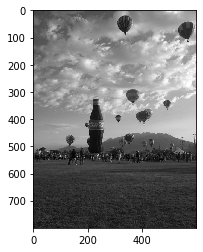

In [12]:
picture = imread('balloon.jpg', as_gray=True) * 1./255
plt.imshow(picture, cmap=cm.gray)
plt.show()


In [22]:
def anisdiff_bw(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    m,n = np.shape(U)
    #create the padded image
    newpic = np.zeros((m+2,n+2))
    newpic[1:-1,1:-1] = U
    newpic[0,1:-1] = U[0]
    newpic[-1,1:-1] = U[-1]
    newpic[1:-1,0] = U[:,0]
    newpic[1:-1,-1] = U[:,-1]
    #make the image we'll use
    compl = np.zeros((m,n))
    
    for b in range(N):
        for a in range(1,m+1):
            #go row by row and compute the new values for the next iteration
            compl[a-1] = newpic[a,1:-1]+lambda_*((g(np.abs(newpic[a,:-2]-newpic[a,1:-1]))*(newpic[a,:-2]-newpic[a,1:-1])+(g(np.abs(newpic[a,2:]-newpic[a,1:-1]))*(newpic[a,2:]-newpic[a,1:-1]))+(g(np.abs(newpic[a-1,1:-1]-newpic[a,1:-1]))*(newpic[a-1,1:-1]-newpic[a,1:-1]))+(g(np.abs(newpic[a+1,1:-1]-newpic[a,1:-1]))*(newpic[a+1,1:-1]-newpic[a,1:-1]))))
        #remake the padded image
        newpic[1:-1,1:-1] = compl
        newpic[0,1:-1] = compl[0]
        newpic[-1,1:-1] = compl[-1]
        newpic[1:-1,0] = compl[:,0]
        newpic[1:-1,-1] = compl[:,-1]
    return compl
    
    
    
    

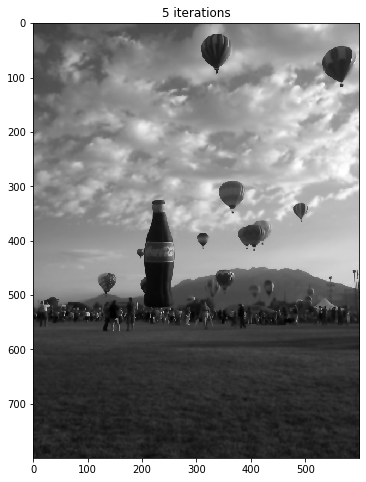

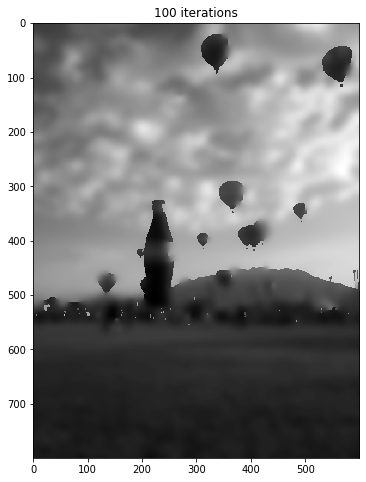

In [22]:
# run code to test anisdiff_bw function
sig = .1
lmb = .25
g = lambda x: np.e**(-((x/sig)**2))
#calculate it at 5, 20 and 100 iterations
pic5 = anisdiff_bw(picture,5,lmb,g)
pic20 = anisdiff_bw(picture,20,lmb,g)
pic100 = anisdiff_bw(picture,100,lmb,g)
#plot everything
plt.figure(figsize=(10,8))
plt.imshow(pic5, cmap=cm.gray)
plt.title("5 iterations")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(pic20, cmap=cm.gray)
plt.title("20 iterations")
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(pic100, cmap=cm.gray)
plt.title("100 iterations")
plt.show()

# Problem 2

Complete the following function to process a colored image. You may modify
your colde from the previous problem. Measure the difference between pixels using the 2-norm.
Use the corresponding vector versions of the boundary conditions given in Problem 1.

Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.
Hint: If you have an m×n×3 matrix representing the RGB dierences of each pixel, then
to nd a matrix representing the norm of the dierences, you can use the following code. This
code squares each value and sums along the last axis, and takes the square root. In order to
keep the dimension size of the matrix and aid in broadcasting, you must use keepdims=True

In [19]:
def anisdiff_color(U, N, lambda_, sigma):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    
    #for each iteration
    for b in range(N):
        #get the dimensions to make the padded version of the picture to use
        m,n ,l= np.shape(U)
        #make the padded image
        newpic = np.zeros((m+2,n+2,l))
        newpic[1:-1,1:-1,:] = U
        newpic[0,1:-1,:] = U[0]
        newpic[-1,1:-1,:] = U[-1]
        newpic[1:-1,0,:] = U[:,0]
        newpic[1:-1,-1,:] = U[:,-1]
        #calculate the norm of each of the steps
        p1 = np.sqrt(np.sum((newpic[:-2,1:-1]-U)**2,axis=2,keepdims=True))
        p2 = np.sqrt(np.sum((newpic[2:,1:-1]-U)**2,axis=2,keepdims=True))
        p3 = np.sqrt(np.sum((newpic[1:-1,:-2]-U)**2,axis=2,keepdims=True))
        p4 = np.sqrt(np.sum((newpic[1:-1,2:]-U)**2,axis=2,keepdims=True))
        #redefine U according to the algorithm given
        U = U + lambda_*((g(p1))*(newpic[:-2,1:-1]-U)
                         +(g(p2))*(newpic[2:,1:-1]-U)
                         +(g(p3))*(newpic[1:-1,:-2]-U)
                         +(g(p4))*(newpic[1:-1,2:]-U))
    
    return U

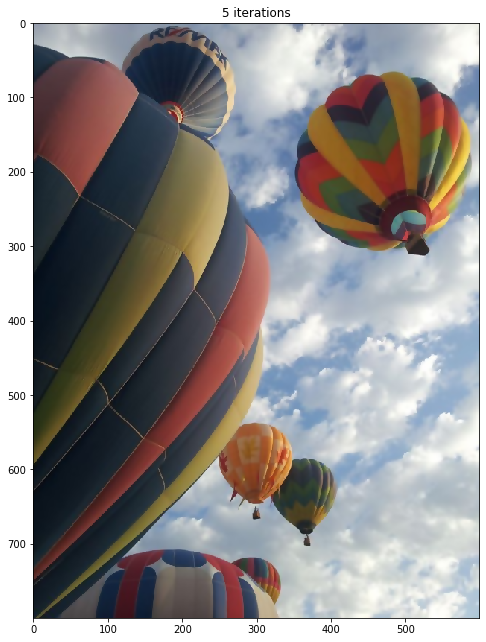

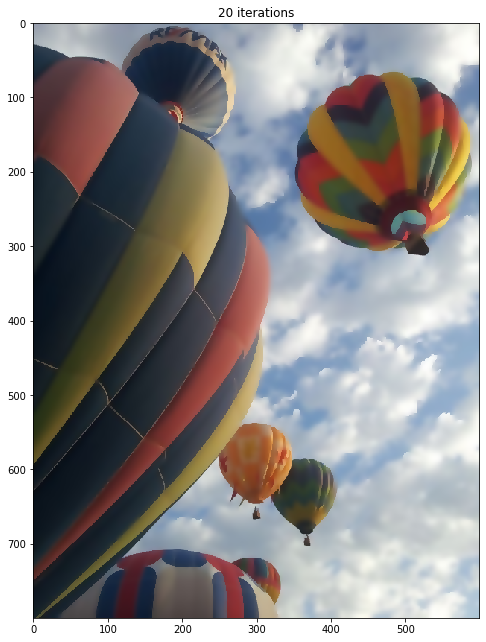

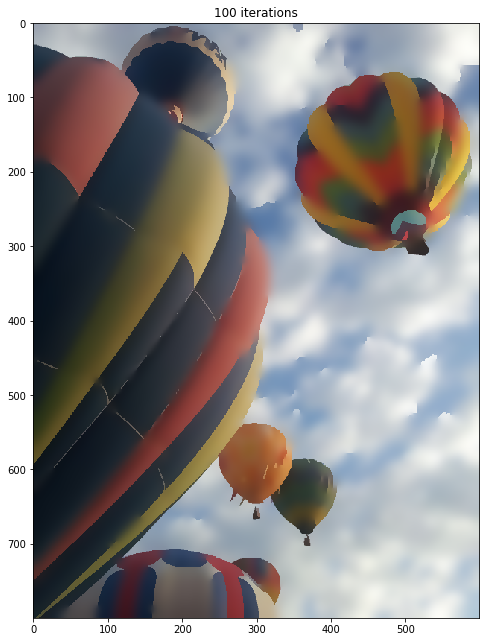

In [21]:
picture = imread('balloons_color.jpg') * 1./255
sig = .1
lmb = .25
g = lambda x: np.e**(-((x/sig)**2))
#calculate the pictures of the different iterations
pic5 = anisdiff_color(picture,5,lmb,sig)
pic20 = anisdiff_color(picture,20,lmb,sig)
pic100 = anisdiff_color(picture,100,lmb,sig)
#plot all the different images
plt.figure(figsize=(8,11))
plt.imshow(pic5)
plt.title("5 iterations")
plt.show()
plt.figure(figsize=(8,11))
plt.imshow(pic20)
plt.title("20 iterations")
plt.show()
plt.figure(figsize=(8,11))
plt.imshow(pic100)
plt.title("100 iterations")
plt.show()

# Problem 3

Use the given code to add noise to your grayscale image.

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Hint: don't forget to rescale

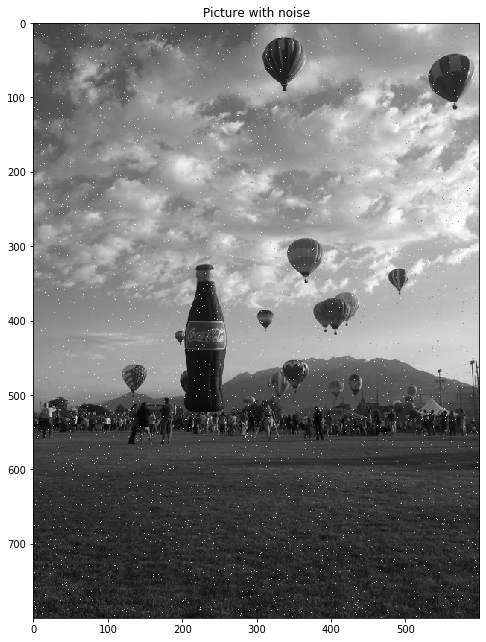

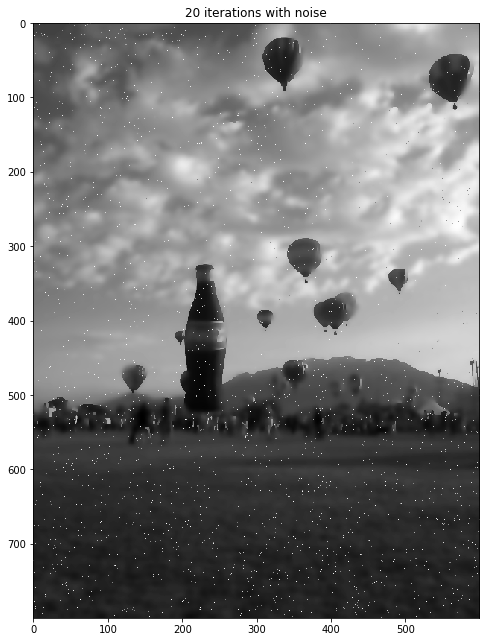

In [27]:
# use the following code to add noise to your grayscale image
from numpy.random import randint
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
image = image*1./255

sig = .1
lmb = .25
N = 20
g = lambda x: np.e**(-((x/sig)**2))
#calculate the picture that doesnt get helped
picnot = anisdiff_bw(image,N,lmb,g)
#plot the noisy pic and noisy pic after the anisotropic diffusion
plt.figure(figsize=(8,11))
plt.imshow(image,cmap=cm.gray)
plt.title("Picture with noise")
plt.show()

plt.figure(figsize=(8,11))
plt.imshow(picnot,cmap=cm.gray)
plt.title("20 iterations with noise")
plt.show()
# don't forget to rescale

# display original and noisy image

### Anisotropic diffusion does not smooth out the noise because ... (finish this sentance)

The noise creates an edge and thus is not affected as much by the anisotropic diffusion. 